<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# Biểu Đồ Diện Tích, Lịch Sử Tần Suất, và Biểu Đồ Cột

Thời gian ước tính: **30** phút

## Mục Tiêu

Sau khi hoàn thành bài lab này, bạn sẽ có thể:

*   Tạo thêm các biểu đồ diện tích, histogram và biểu đồ cột.

## Mục Lục

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Khám Phá Bộ Dữ Liệu với *pandas*](#0)<br>
2.  [Tải và Chuẩn Bị Dữ Liệu](#2)<br>
3.  [Trực Quan Hóa Dữ Liệu Sử Dụng Matplotlib](#4) <br>
4.  [Biểu Đồ Diện Tích](#6) <br>
5.  [Biểu Đồ Lịch Sử Tần Suất](#8) <br>
6.  [Biểu Đồ Cột](#10) <br>

</div>

# Khám Phá Bộ Dữ Liệu với *pandas* và Matplotlib<a id="0"></a>

Công Cụ: Khóa học này chủ yếu sử dụng [**pandas**](http://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) và [**Numpy**](http://www.numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) để xử lý dữ liệu, phân tích và trực quan hóa. Thư viện vẽ biểu đồ chính mà chúng ta sẽ khám phá trong khóa học là [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

Bộ Dữ Liệu: Nhập cư vào Canada từ 1980 đến 2013 - [Dòng di cư quốc tế đến và đi từ các quốc gia đã chọn - Phiên bản 2015](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) từ website của Liên Hợp Quốc.

Bộ dữ liệu chứa thông tin hàng năm về dòng di cư quốc tế được các quốc gia đích đến ghi nhận. Dữ liệu này trình bày cả dòng nhập cư và xuất cư theo nơi sinh, quốc tịch hoặc nơi cư trú trước/sau đối với cả người nước ngoài và công dân. Trong bài học này, chúng ta sẽ tập trung vào dữ liệu nhập cư vào Canada.

# Tải và Chuẩn Bị Dữ Liệu <a id="2"></a>

Điều đầu tiên chúng ta sẽ làm là cài đặt **openpyxl** (trước đây là **xlrd**), một mô-đun mà *pandas* yêu cầu để đọc các tệp Excel.

Nhập các mô-đun chính. Điều đầu tiên chúng ta sẽ làm là nhập hai mô-đun phân tích dữ liệu chính: `pandas` và `numpy`.

In [12]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Tải bộ dữ liệu nhập cư vào Canada và đọc nó vào một dataframe của *pandas*.

In [13]:
# Đọc file Excel từ thư mục hiện tại
df_can = pd.read_excel("Canada.xlsx",  # Chỉ cần tên file nếu file nằm trong cùng thư mục
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Hãy xem năm mục đầu tiên trong bộ dữ liệu của chúng ta.

In [14]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Hãy tìm hiểu xem có bao nhiêu mục trong bộ dữ liệu của chúng ta.


In [15]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


Dọn dẹp dữ liệu. Chúng ta sẽ thực hiện một số sửa đổi đối với bộ dữ liệu gốc để làm cho việc tạo các trực quan hóa dễ dàng hơn. Tham khảo bài lab `Giới thiệu về Matplotlib và Biểu đồ Đường` để hiểu lý do và mô tả chi tiết các thay đổi.

#### 1. Dọn dẹp bộ dữ liệu để loại bỏ các cột không có thông tin hữu ích cho việc trực quan hóa (ví dụ: Type, AREA, REG).

In [16]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Lưu ý cách mà các cột Type, Coverage, AREA, REG, và DEV đã bị loại bỏ khỏi dataframe.

#### 2. Đổi tên một số cột sao cho chúng có ý nghĩa.

In [17]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Lưu ý cách mà các tên cột bây giờ trở nên hợp lý hơn, ngay cả đối với người ngoài.

#### 3. Để đảm bảo tính nhất quán, đảm bảo rằng tất cả các nhãn cột đều có kiểu dữ liệu là chuỗi.

In [18]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_can.columns)

False

Lưu ý cách mà dòng mã trên trả về *False* khi chúng ta kiểm tra xem tất cả các nhãn cột có kiểu dữ liệu là **chuỗi** hay không. Vì vậy, hãy thay đổi tất cả chúng thành kiểu **chuỗi**.


In [19]:
df_can.columns = list(map(str, df_can.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)

True

#### 4. Thiết lập tên quốc gia làm chỉ mục - hữu ích cho việc tra cứu nhanh các quốc gia bằng phương thức .loc.

In [20]:
df_can.set_index('Country', inplace=True)

# Let's view the first five elements and see how the dataframe was changed
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


Lưu ý rằng bây giờ các tên quốc gia được sử dụng làm chỉ mục.

#### 5. Thêm cột tổng.


In [21]:
df_can.columns = df_can.columns.astype(str)  # Chuyển đổi tên cột thành chuỗi
df_can['Total'] = df_can.loc[:, '1980':'2013'].sum(axis=1)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Bây giờ dataframe có một cột bổ sung hiển thị tổng số người nhập cư từ mỗi quốc gia trong bộ dữ liệu từ năm 1980 - 2013. Vì vậy, nếu chúng ta in kích thước của dữ liệu, chúng ta sẽ có:


In [22]:
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


Vì vậy, bây giờ dataframe của chúng ta có 38 cột thay vì 37 cột như trước đây.

In [23]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Trực Quan Hóa Dữ Liệu Sử Dụng Matplotlib<a id="4"></a>
Nhập thư viện `matplotlib`.

In [24]:
# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')  # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.10.0


# Biểu Đồ Diện Tích<a id="6"></a>
Trong module trước, chúng ta đã tạo một biểu đồ đường để trực quan hóa 5 quốc gia đóng góp nhiều người nhập cư nhất vào Canada từ năm 1980 đến 2013. Với một chút thay đổi trong mã, chúng ta có thể trực quan hóa biểu đồ này dưới dạng biểu đồ tích lũy, còn được gọi là **Biểu Đồ Đường Chồng Lên** hoặc **Biểu Đồ Diện Tích**.

In [25]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Biểu đồ diện tích mặc định được xếp chồng lên nhau. Để tạo biểu đồ diện tích chồng, mỗi cột phải có tất cả các giá trị dương hoặc tất cả các giá trị âm (bất kỳ giá trị `NaN`, tức là không phải số, sẽ mặc định là 0). Để tạo biểu đồ diện tích không xếp chồng, hãy thiết lập tham số `stacked` với giá trị `False`.

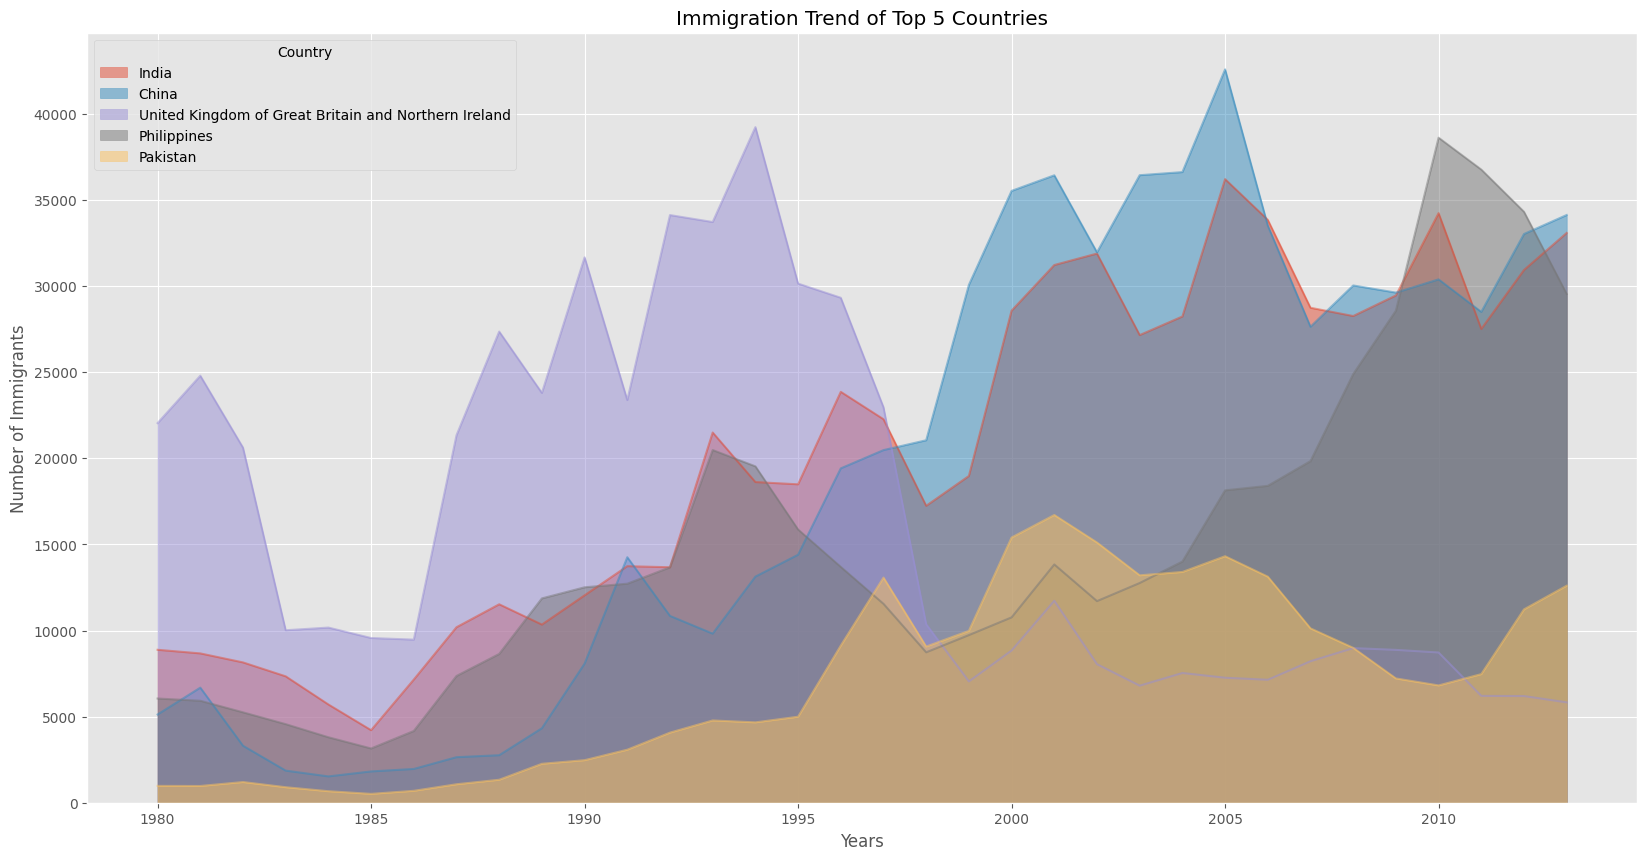

In [26]:
# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Biểu đồ không xếp chồng có độ trong suốt mặc định (giá trị alpha) là 0.5. Chúng ta có thể sửa đổi giá trị này bằng cách truyền tham số `alpha`.

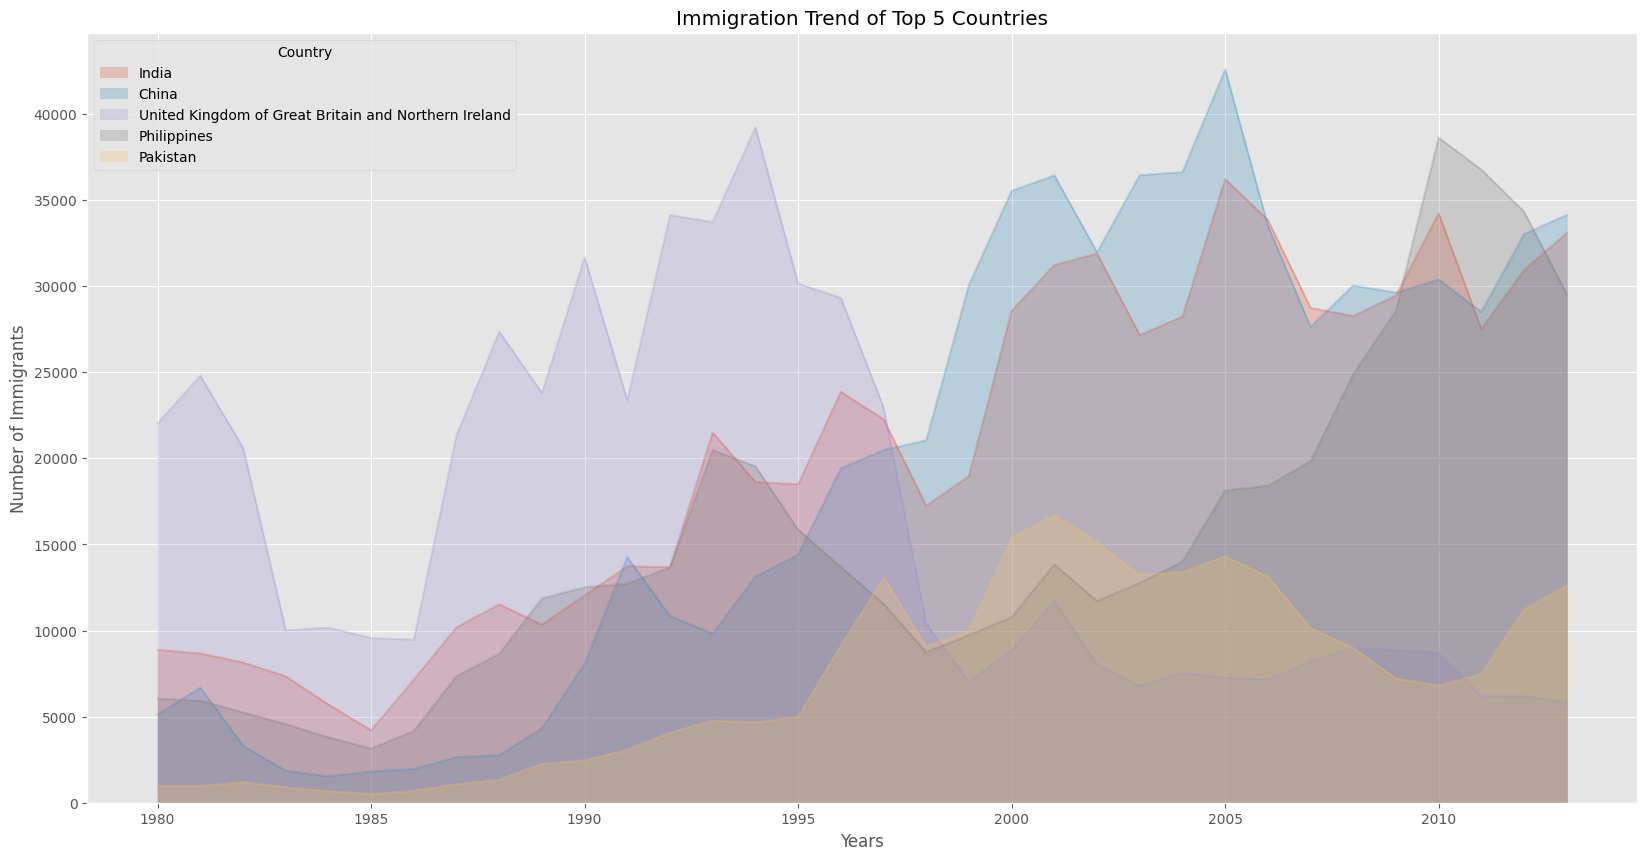

In [27]:
df_top5.plot(kind='area', 
             alpha=0.25,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Hai kiểu vẽ biểu đồ

Như chúng ta đã thảo luận trong các bài giảng video, có hai phong cách/lựa chọn vẽ biểu đồ với `matplotlib`, đó là vẽ biểu đồ sử dụng lớp Artist và vẽ biểu đồ sử dụng lớp scripting.

**Lựa chọn 1: Lớp scripting (phương pháp thủ tục) - sử dụng matplotlib.pyplot dưới tên 'plt'**

Bạn có thể sử dụng `plt`, tức là `matplotlib.pyplot` và thêm các yếu tố bằng cách gọi các phương thức khác nhau theo phương pháp thủ tục; ví dụ, `plt.title(...)` để thêm tiêu đề hoặc `plt.xlabel(...)` để thêm nhãn cho trục x.
```python
    # Option 1: This is what we have been using so far
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
```


**Lựa chọn 2: Lớp Artist (phương pháp hướng đối tượng) - sử dụng đối tượng `Axes` từ Matplotlib (ưu tiên)**

Bạn có thể sử dụng đối tượng `Axes` của biểu đồ hiện tại và lưu nó vào một biến (ví dụ: `ax`). Bạn có thể thêm các yếu tố khác bằng cách gọi các phương thức với một chút thay đổi về cú pháp (bằng cách thêm "`set_`" vào trước các phương thức trước đó). Ví dụ, sử dụng `ax.set_title()` thay vì `plt.title()` để thêm tiêu đề, hoặc `ax.set_xlabel()` thay vì `plt.xlabel()` để thêm nhãn cho trục x.

Lựa chọn này đôi khi minh bạch và linh hoạt hơn khi sử dụng cho các biểu đồ nâng cao (đặc biệt khi có nhiều biểu đồ, như bạn sẽ thấy sau này).

Trong khóa học này, chúng ta sẽ sử dụng **lớp scripting**, ngoại trừ một số trực quan hóa nâng cao mà chúng ta sẽ cần sử dụng **lớp artist** để thao tác với các khía cạnh nâng cao của các biểu đồ.

Text(0.5, 0, 'Years')

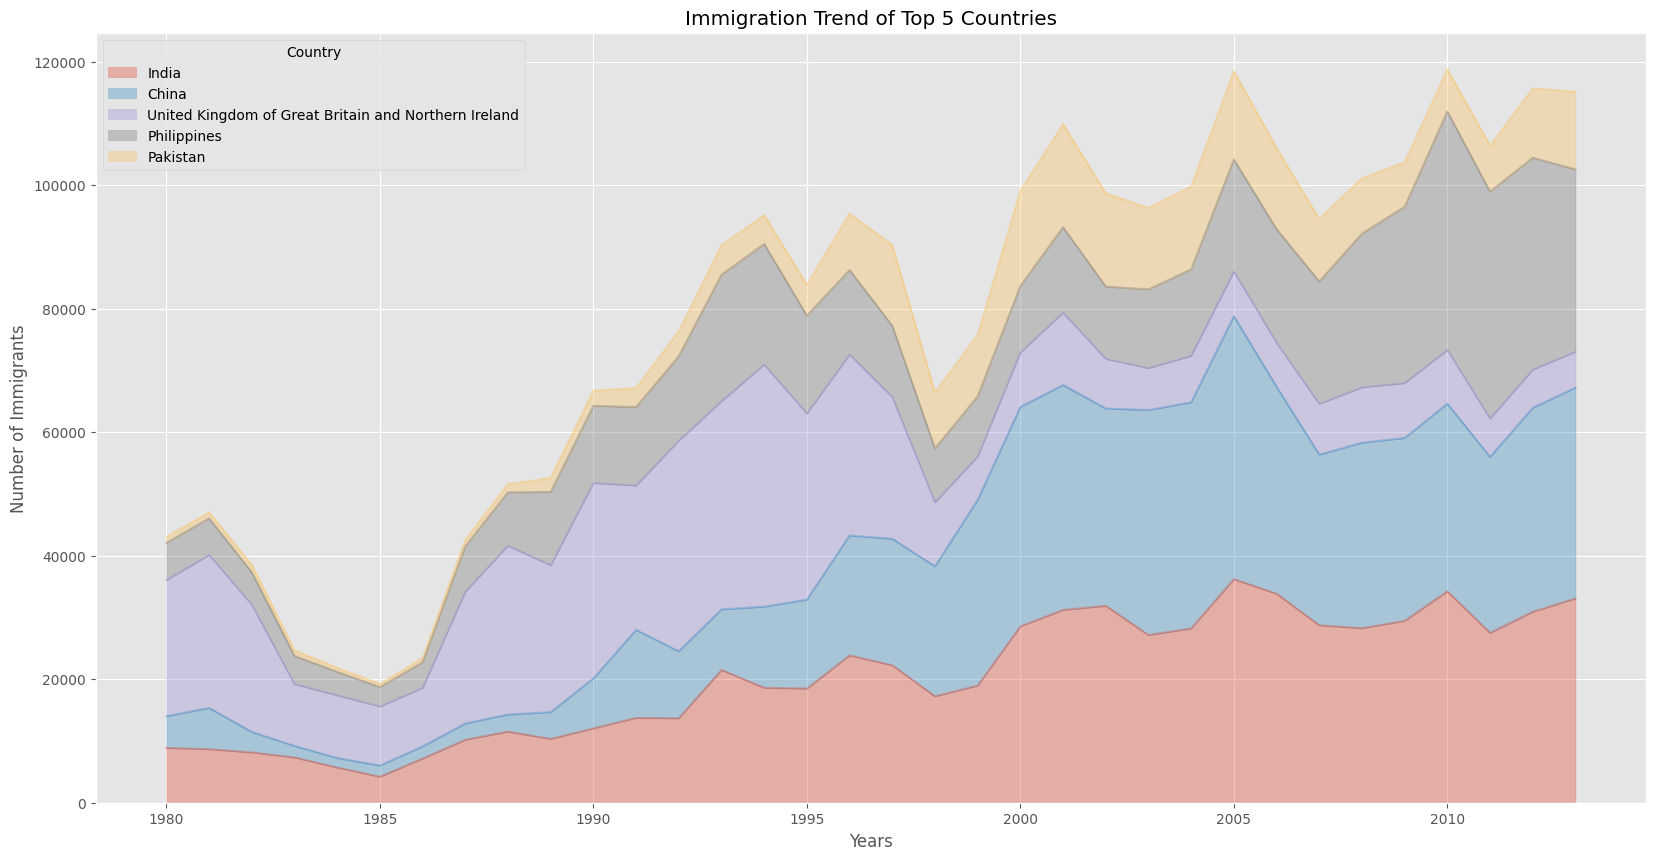

In [28]:
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

**Câu hỏi**: Sử dụng lớp scripting để tạo một biểu đồ diện tích chồng của 5 quốc gia đóng góp ít nhất vào nhập cư vào Canada **từ** năm 1980 đến 2013. Sử dụng giá trị độ trong suốt là 0.45.


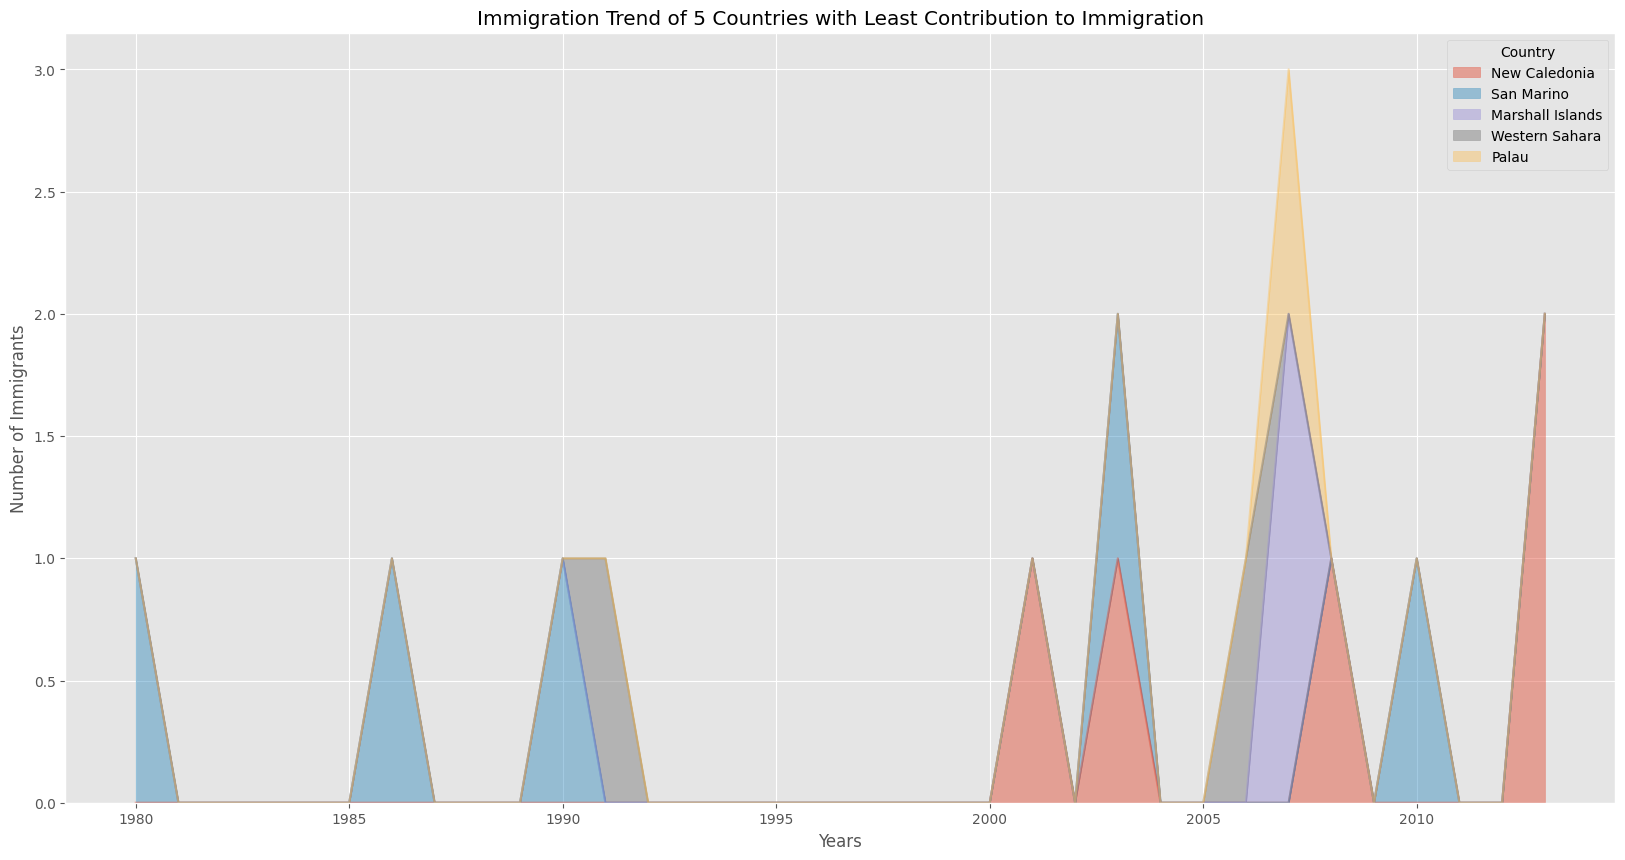

In [29]:
#The correct answer is:
# get the 5 countries with the least contribution
df_least5 = df_can.tail(5)
     
# transpose the dataframe
df_least5 = df_least5[years].transpose() 
df_least5.head()

df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10)) 

plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

**Câu hỏi**: Sử dụng lớp artist để tạo một biểu đồ diện tích không xếp chồng của 5 quốc gia đóng góp ít nhất vào nhập cư vào Canada **từ** năm 1980 đến 2013. Sử dụng giá trị độ trong suốt là 0.55.


Text(0.5, 0, 'Years')

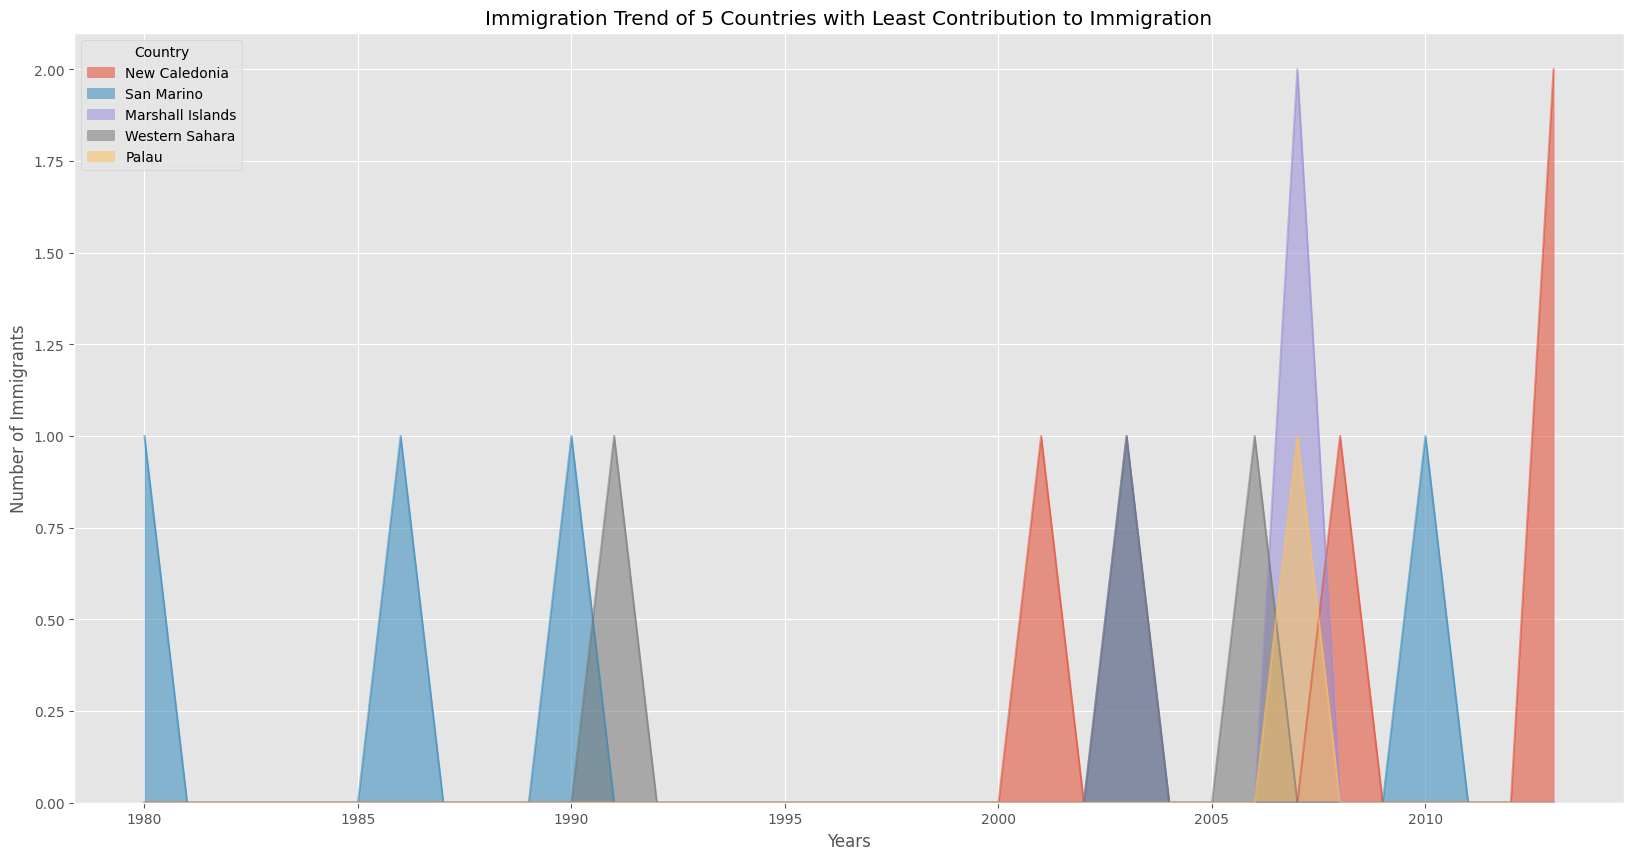

In [30]:
# get the 5 countries with the least contribution
df_least5 = df_can.tail(5)

# transpose the dataframe
df_least5 = df_least5[years].transpose() 
    
df_least5.head()

df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
    
ax = df_least5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))
    
ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

# Histograms<a id="8"></a>

Biểu đồ lịch sử tần suất (Histogram) là một cách để đại diện cho phân phối *tần suất* của bộ dữ liệu số. Cách thức hoạt động của nó là phân chia trục x thành các *khoảng (bins)*, gán mỗi điểm dữ liệu trong bộ dữ liệu của chúng ta vào một khoảng, và sau đó đếm số lượng điểm dữ liệu đã được gán vào mỗi khoảng. Vì vậy, trục y là tần suất hoặc số lượng điểm dữ liệu trong mỗi khoảng. Lưu ý rằng chúng ta có thể thay đổi kích thước khoảng và thường thì cần phải điều chỉnh nó sao cho phân phối được hiển thị một cách đẹp mắt.

**Câu hỏi:** Phân phối tần suất của số lượng (dân số) người nhập cư mới từ các quốc gia khác nhau vào Canada trong năm 2013 là gì?

Trước khi tiếp tục với việc tạo biểu đồ lịch sử tần suất, chúng ta sẽ xem xét dữ liệu được chia thành các khoảng. Để làm điều này, chúng ta sẽ sử dụng phương thức `histogram` của **Numpy** để có được phạm vi các khoảng và số lượng tần suất như sau:


In [31]:
# let's quickly view the 2013 data
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [32]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Theo mặc định, phương thức `histogram` chia bộ dữ liệu thành 10 khoảng (bins). Hình dưới đây tóm tắt các phạm vi khoảng và phân phối tần suất của nhập cư trong năm 2013. Chúng ta có thể thấy rằng trong năm 2013:

*   178 quốc gia đóng góp từ 0 đến 3412.9 người nhập cư
*   11 quốc gia đóng góp từ 3412.9 đến 6825.8 người nhập cư
*   1 quốc gia đóng góp từ 6285.8 đến 10238.7 người nhập cư, và tiếp tục như vậy...

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%202/images/Mod2Fig1-Histogram.jpg" align="center" width="800">

Chúng ta có thể dễ dàng vẽ đồ thị phân phối này bằng cách truyền `kind=hist` vào phương thức `plot()`.


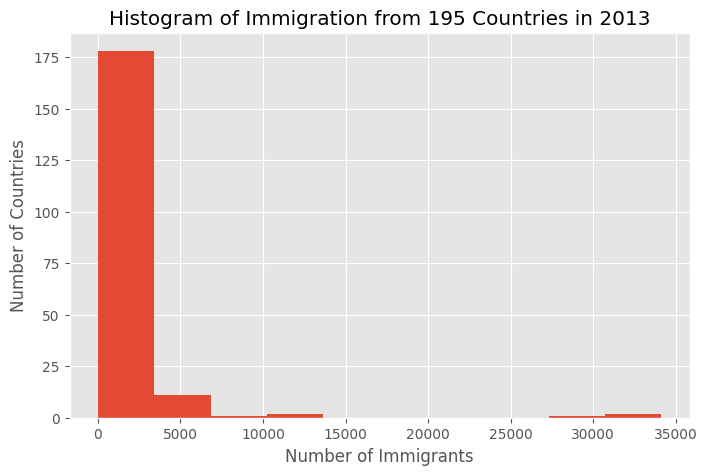

In [33]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of Immigration from 195 Countries in 2013')
# add y-label
plt.ylabel('Number of Countries')
# add x-label
plt.xlabel('Number of Immigrants')

plt.show()

Trong biểu đồ trên, trục x đại diện cho phạm vi dân số của người nhập cư trong các khoảng cách 3412.9. Trục y đại diện cho số lượng quốc gia đã đóng góp vào dân số trên.

Lưu ý rằng các nhãn trục x không khớp với kích thước các khoảng. Điều này có thể được khắc phục bằng cách truyền tham số `xticks` chứa danh sách kích thước của các khoảng, như sau:


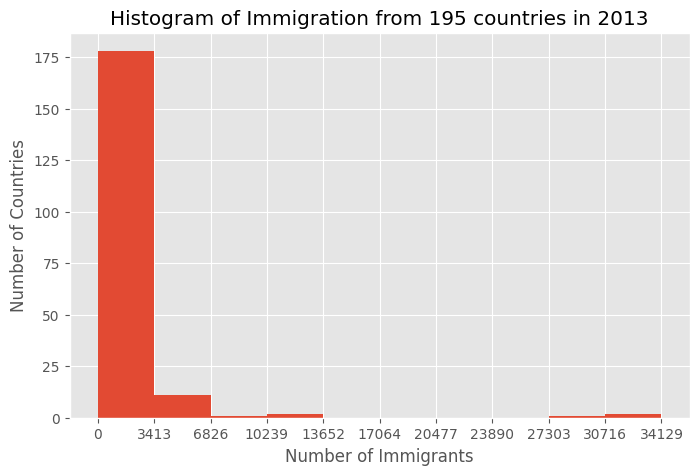

In [34]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

*Chú ý bên lề:* Thay vào đó, chúng ta có thể sử dụng `df_can['2013'].plot.hist()`. Thực tế, trong suốt bài học này, việc sử dụng `some_data.plot(kind='type_plot', ...)` tương đương với `some_data.plot.type_plot(...)`. Tức là, truyền loại biểu đồ dưới dạng tham số hoặc phương thức sẽ có hành vi tương tự.

Xem tài liệu *pandas* để biết thêm thông tin [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

Chúng ta cũng có thể vẽ nhiều biểu đồ histogram trên cùng một biểu đồ. Ví dụ, hãy thử trả lời các câu hỏi sau bằng cách sử dụng histogram.

**Câu hỏi**: Phân phối nhập cư của Đan Mạch, Na Uy và Thụy Điển trong các năm từ 1980 - 2013 là gì?

In [35]:
# let's quickly view the dataset 
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<Axes: ylabel='Frequency'>

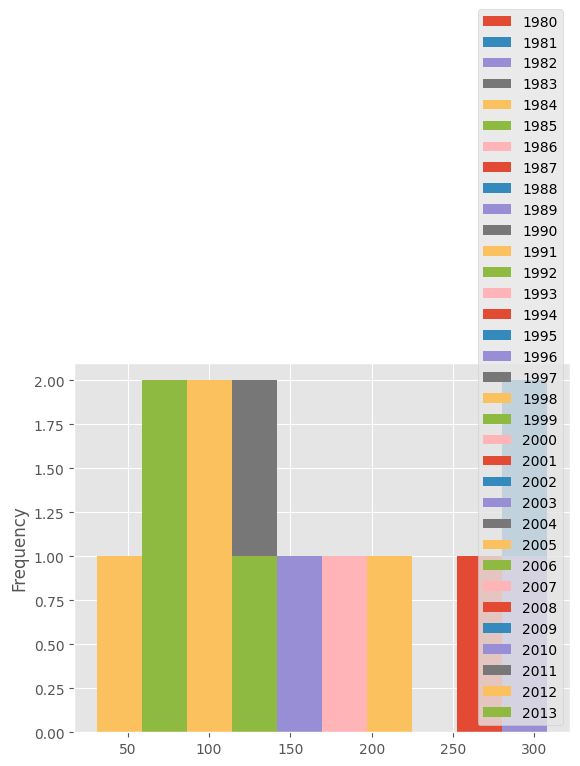

In [36]:
# generate histogram
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

Điều đó có vẻ không đúng!

Đừng lo, bạn sẽ thường xuyên gặp phải những tình huống như thế này khi tạo biểu đồ. Giải pháp thường nằm ở cách mà bộ dữ liệu cơ sở được cấu trúc.

Thay vì vẽ phân phối tần suất dân số của 3 quốc gia, *pandas* lại vẽ phân phối tần suất dân số cho các `năm`.

Điều này có thể dễ dàng khắc phục bằng cách chuyển vị dữ liệu trước, sau đó vẽ biểu đồ như sau.


In [37]:
# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


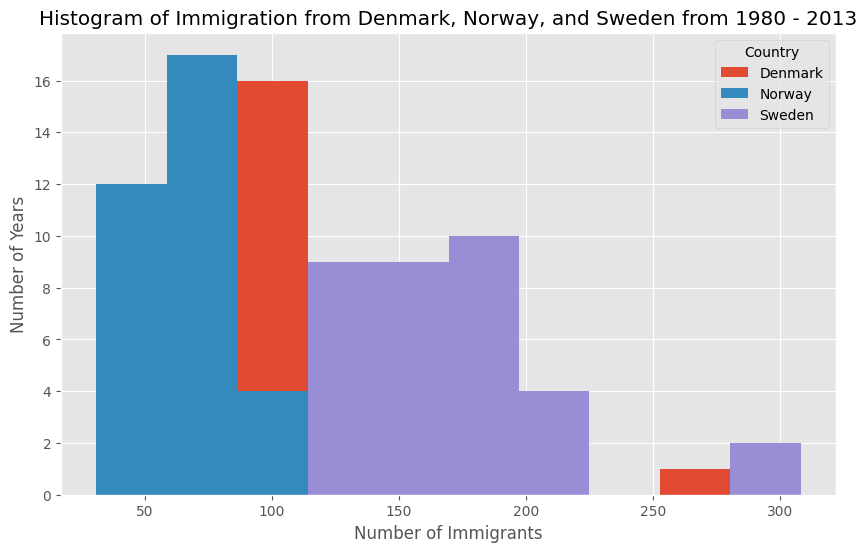

In [38]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Hãy thực hiện một vài thay đổi để cải thiện ảnh hưởng và tính thẩm mỹ của biểu đồ trước:

*   Tăng kích thước các ô (bin) lên 15 bằng cách truyền tham số `bins`;
*   Đặt độ trong suốt (transparency) là 60% bằng cách truyền tham số `alpha`;
*   Gán nhãn cho trục x bằng cách truyền tham số `x-label`;
*   Thay đổi màu sắc của biểu đồ bằng cách truyền tham số `color`.

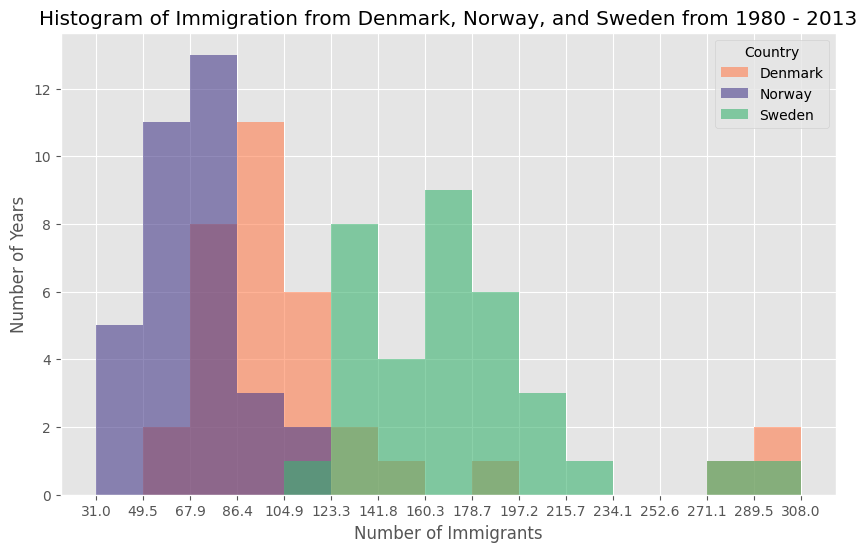

In [39]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Tip:
Để xem danh sách đầy đủ các màu có sẵn trong Matplotlib, bạn có thể chạy đoạn mã sau trong shell Python của mình:
```python
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
```


Nếu chúng ta không muốn các biểu đồ chồng lên nhau, chúng ta có thể xếp chồng chúng lại với nhau bằng tham số `stacked`. Hãy điều chỉnh nhãn trục x tối thiểu và tối đa để loại bỏ khoảng trống thừa ở các cạnh của biểu đồ. Chúng ta có thể truyền một bộ giá trị (min, max) bằng tham số `xlim`, như dưới đây.

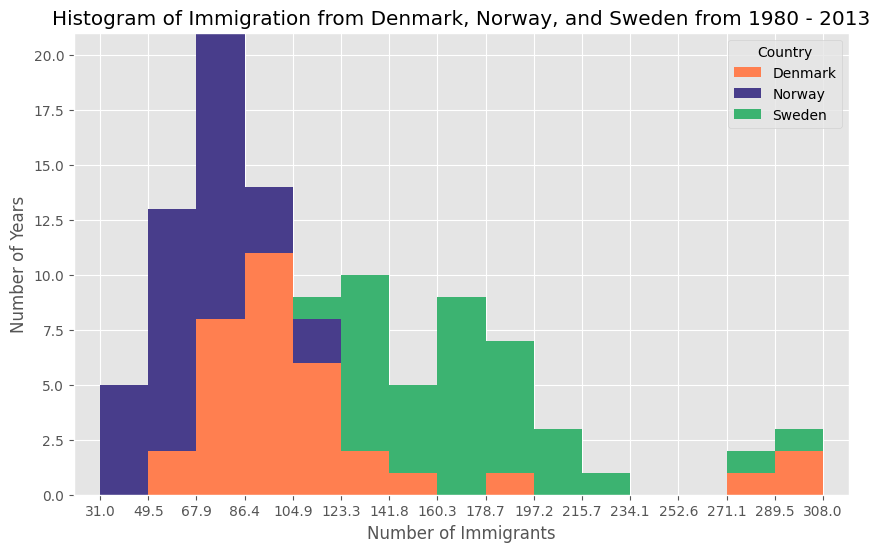

In [40]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

**Câu hỏi**: Sử dụng lớp kịch bản để hiển thị phân phối di cư cho Hy Lạp, Albania và Bulgaria trong các năm từ 1980 - 2013? Sử dụng biểu đồ chồng lấn với 15 ô (bin) và giá trị độ trong suốt (transparency) là 0.35.

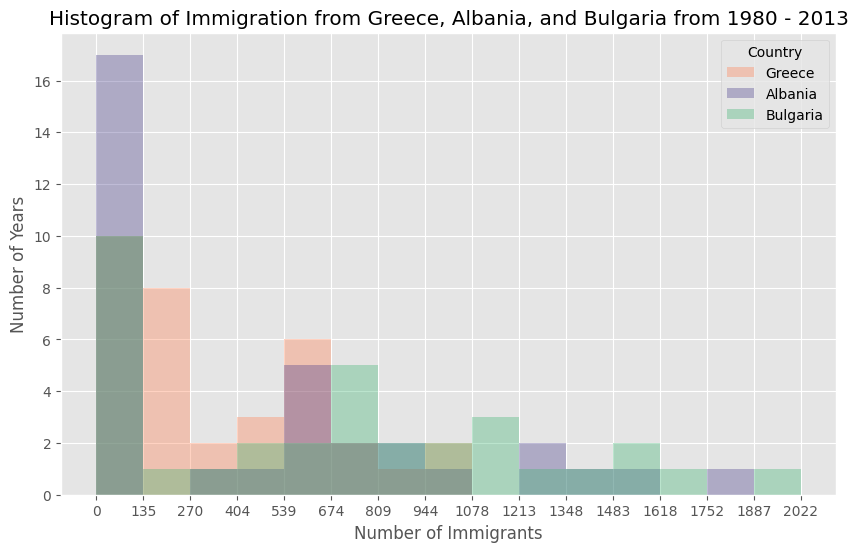

In [41]:
# create a dataframe of the countries of interest (cof)
df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]

# transpose the dataframe
df_cof = df_cof.transpose() 

# let's get the x-tick values
count, bin_edges = np.histogram(df_cof, 15)

# Un-stacked Histogram
df_cof.plot(kind ='hist',
                figsize=(10, 6),
                bins=15,
                alpha=0.35,
                xticks=bin_edges,
                color=['coral', 'darkslateblue', 'mediumseagreen']
                )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

# Biểu đồ cột (Dataframe) <a id="10"></a>

Biểu đồ cột là một cách để biểu diễn dữ liệu, trong đó *chiều dài* của các cột đại diện cho mức độ/quy mô của đặc trưng/biến số. Biểu đồ cột thường đại diện cho các biến số số học và phân loại, được nhóm theo các khoảng.

Để tạo một biểu đồ cột, chúng ta có thể truyền một trong hai tham số thông qua tham số `kind` trong `plot()`:

*   `kind=bar` tạo ra một biểu đồ cột *dọc*
*   `kind=barh` tạo ra một biểu đồ cột *ngang*

**Biểu đồ cột dọc**

Trong biểu đồ cột dọc, trục x được dùng để gán nhãn, và chiều dài của các cột trên trục y tương ứng với mức độ của biến đang được đo. Biểu đồ cột dọc đặc biệt hữu ích trong việc phân tích dữ liệu chuỗi thời gian. Một nhược điểm là chúng thiếu không gian để ghi nhãn văn bản dưới chân mỗi cột.

**Hãy bắt đầu bằng việc phân tích tác động của Khủng hoảng Tài chính Iceland:**

Khủng hoảng Tài chính Iceland 2008 - 2011 là một sự kiện lớn về kinh tế và chính trị tại Iceland. So với quy mô nền kinh tế, sự sụp đổ hệ thống ngân hàng của Iceland là sự kiện lớn nhất từng xảy ra trong lịch sử kinh tế của bất kỳ quốc gia nào. Khủng hoảng này đã dẫn đến một cuộc suy thoái kinh tế nghiêm trọng từ năm 2008 đến 2011 và tình trạng bất ổn chính trị đáng kể.

**Câu hỏi:** Hãy so sánh số lượng người nhập cư Iceland (quốc gia = 'Iceland') vào Canada từ năm 1980 đến 2013.

In [42]:
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

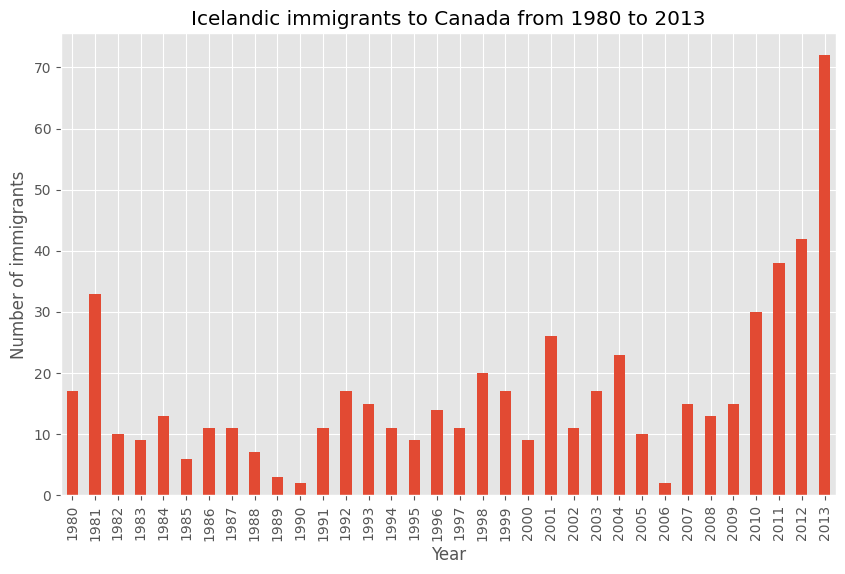

In [43]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

Biểu đồ cột trên cho thấy tổng số người nhập cư được phân chia theo từng năm. Chúng ta có thể thấy rõ tác động của khủng hoảng tài chính; số lượng người nhập cư vào Canada bắt đầu tăng nhanh sau năm 2008.

Hãy chú thích điều này trên biểu đồ bằng cách sử dụng phương thức `annotate` của **lớp kịch bản** hoặc **giao diện pyplot**. Chúng ta sẽ truyền vào các tham số sau:

*   `s`: str, văn bản chú thích.
*   `xy`: Tuple chỉ điểm (x, y) cần chú thích (trong trường hợp này là điểm cuối của mũi tên).
*   `xytext`: Tuple chỉ điểm (x, y) để đặt văn bản (trong trường hợp này là điểm bắt đầu của mũi tên).
*   `xycoords`: Hệ tọa độ mà xy được cung cấp trong đó - 'data' sử dụng hệ tọa độ của đối tượng đang được chú thích (mặc định).
*   `arrowprops`: Chấp nhận một từ điển các thuộc tính để vẽ mũi tên:
    *   `arrowstyle`: Chỉ định kiểu mũi tên, `'->'` là mũi tên tiêu chuẩn.
    *   `connectionstyle`: Chỉ định kiểu kết nối. `arc3` là đường thẳng.
    *   `color`: Chỉ định màu sắc của mũi tên.
    *   `lw`: Chỉ định độ rộng của đường kẻ.

Tôi khuyến khích bạn đọc tài liệu Matplotlib để tìm hiểu thêm về chú thích:
<http://matplotlib.orsg/api/pyplot_api.html#matplotlib.pyplot.annotate>.


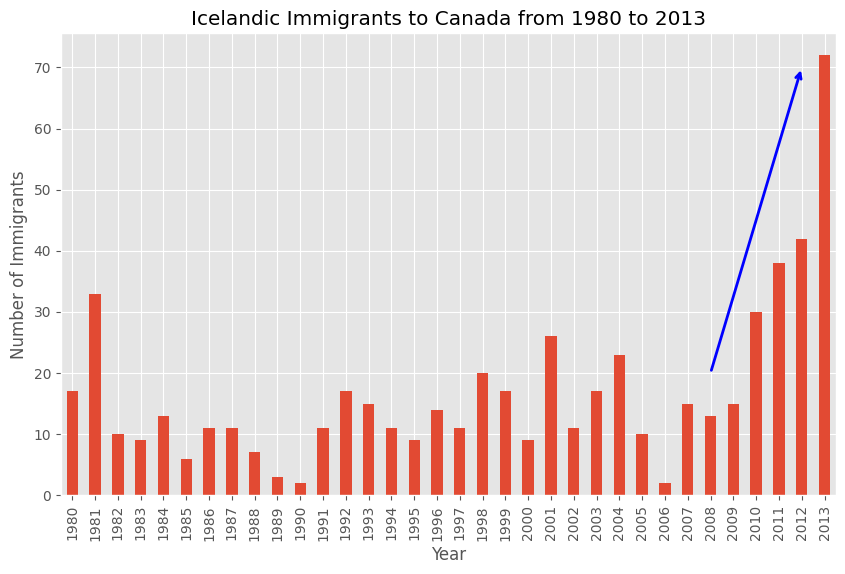

In [44]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

Hãy thêm một chú thích văn bản để đi qua mũi tên. Chúng ta sẽ truyền vào các tham số bổ sung sau:

*   `rotation`: góc xoay của văn bản tính bằng độ (theo chiều ngược kim đồng hồ).
*   `va`: căn chỉnh theo chiều dọc của văn bản \[‘center’ | ‘top’ | ‘bottom’ | ‘baseline’].
*   `ha`: căn chỉnh theo chiều ngang của văn bản \[‘center’ | ‘right’ | ‘left’].

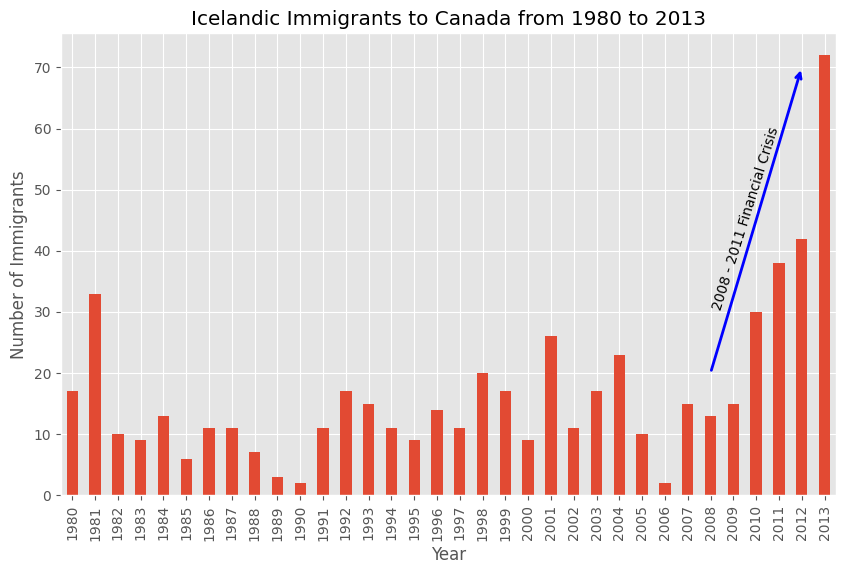

In [45]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

**Horizontal Bar Plot**

Đôi khi việc biểu diễn dữ liệu theo chiều ngang sẽ thực tế hơn, đặc biệt nếu bạn cần nhiều không gian hơn để ghi nhãn các cột. Trong biểu đồ cột ngang, trục y được dùng để ghi nhãn, và chiều dài của các cột trên trục x tương ứng với mức độ của biến đang được đo. Như bạn sẽ thấy, có nhiều không gian hơn trên trục y để ghi nhãn các biến phân loại.

**Câu hỏi:** Sử dụng lớp kịch bản và bộ dữ liệu `df_can`, tạo một biểu đồ cột *ngang* hiển thị *tổng* số người nhập cư vào Canada từ 15 quốc gia đứng đầu, trong khoảng thời gian từ 1980 đến 2013. Ghi nhãn mỗi quốc gia với tổng số người nhập cư.

Bước 1: Lấy dữ liệu liên quan đến 15 quốc gia đứng đầu.


In [46]:
# sort dataframe on 'Total' column (descending)
df_can.sort_values(by='Total', ascending=True, inplace=True)

# get top 15 countries
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

Bước 2: Vẽ biểu đồ:

1.  Sử dụng `kind='barh'` để tạo một biểu đồ cột với các cột ngang.
2.  Hãy chắc chắn chọn kích thước phù hợp cho biểu đồ và ghi nhãn cho các trục cũng như đặt tiêu đề cho biểu đồ.
3.  Lặp qua các quốc gia và chú thích số lượng dân nhập cư bằng cách sử dụng chức năng `annotate` của giao diện kịch bản.

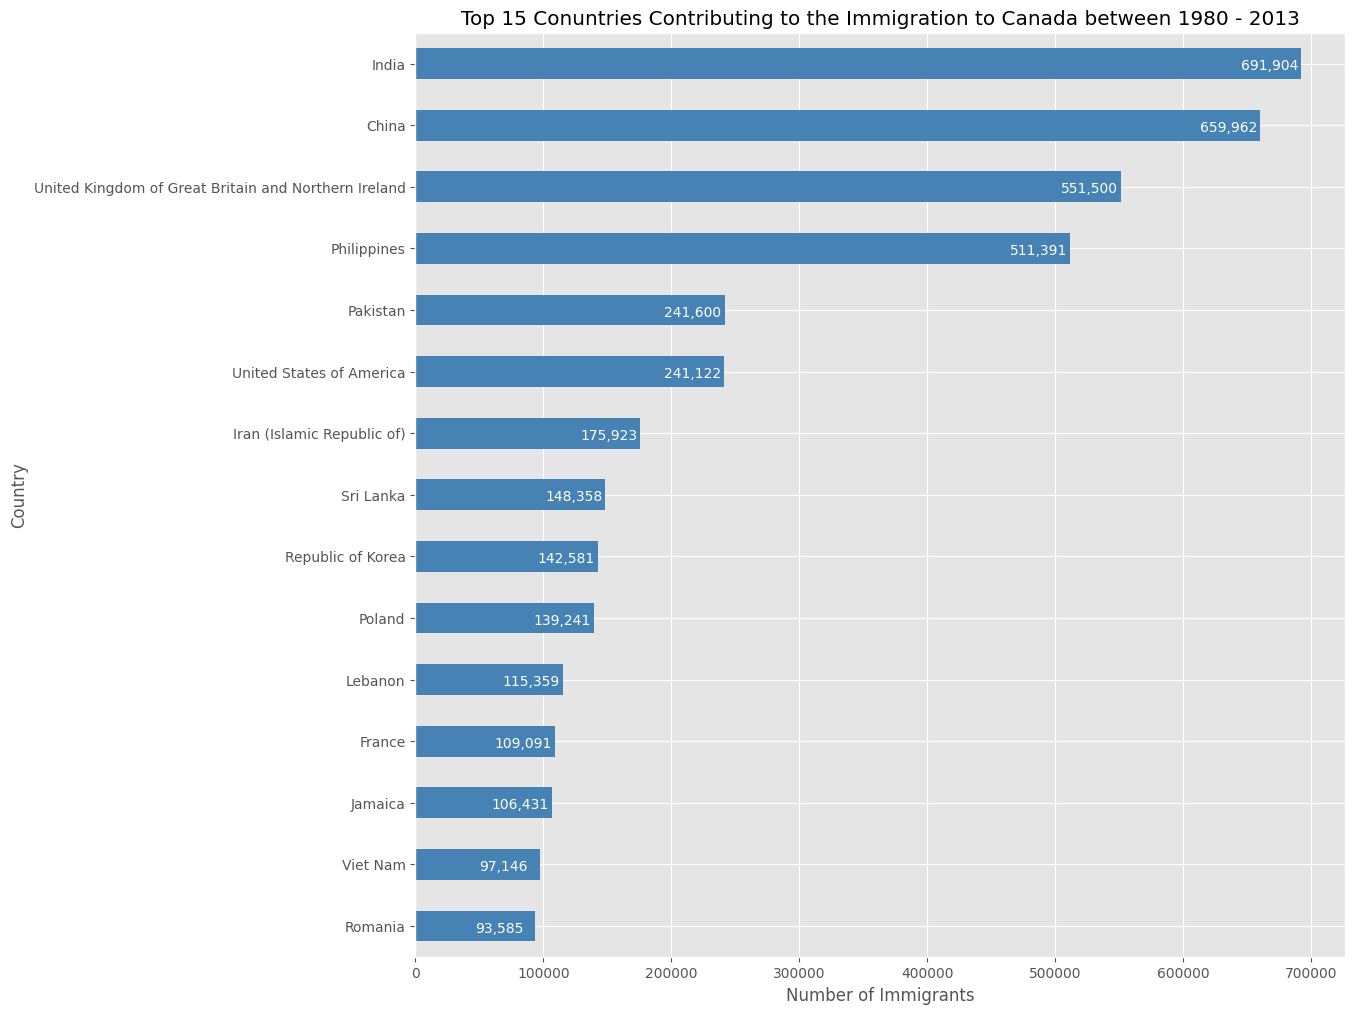

In [47]:
# generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/aklson/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01">Alex Aklson</a>

### Other Contributors

[Jay Rajasekharan](https://www.linkedin.com/in/jayrajasekharan?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01),
[Ehsan M. Kermani](https://www.linkedin.com/in/ehsanmkermani?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01),
[Slobodan Markovic](https://www.linkedin.com/in/slobodan-markovic?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01),
[Weiqing Wang](https://www.linkedin.com/in/weiqing-wang-641640133/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2021-05-29        | 2.4     | Weiqing Wang  | Fixed typos and code smells.       |
| 2021-01-20        | 2.3     | Lakshmi Holla | Changed TOC cell markdown          |
| 2021-01-05        | 2.2     | Lakshmi Holla | Changed solution code for annotate |
| 2020-11-03        | 2.1     | Lakshmi Holla | Changed the URL of excel file      |
| 2020-08-27        | 2.0     | Lavanya       | Moved lab to course repo in GitLab |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
